### Generative Adversarial Network (GAN)

![gan.png](images/gan.png)

Two neural networks: Generator v.s. Discriminator.  Generator generates fake data to simulate something such as an image.  The discriminator tries to figure out if the data generated is fake or not.  It is a competition that drives both neural time to improve.  Overtime, the generator generates data that's almost real (like a fake painting that looks real)

In [41]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()

# mnist image are 28x28 pixels with values from 0 to 255 
# for GANs it's common to normalize data from -1 to 1 which helps the network to train better
x_train = x_train / 127.5 - 1.

# reshape the image to include channel data
x_train = x_train.reshape(-1, 28, 28, 1)
print(x_train.shape)  
# fig = plt.figure(figsize=(4,4))
# for i in range(predictions.shape[0]):
#     plt.subplot(4, 4, i+1)
#     plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='grey')
#     plt.axis('off')
# plt.show()


(60000, 28, 28, 1)


In [31]:
# for the generator we use a "noise vector"
generator = tf.keras.Sequential([
    tf.keras.layers.Dense(7*7*256, input_shape=(100,)),
    tf.keras.layers.Reshape((7, 7, 256)),
    tf.keras.layers.Conv2DTranspose(128, (5,5), strides=(1,1), padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(64, (5,5), strides=(2,2), padding='same', activation='relu'),
    # final layer uses a tanh because the image values is from -1 to 1
    tf.keras.layers.Conv2DTranspose(1, (5,5), strides=(2,2), padding='same', activation='tanh')
])

discriminator = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (5,5), strides=(2,2), padding='same', input_shape=(28,28,1)),
    # Todo study this
    tf.keras.layers.LeakyReLU(),
    # Todo study this - Dropout
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128, (5,5), strides=(2,2), padding='same'),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=False)
# Todo learn Adam optimizer
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

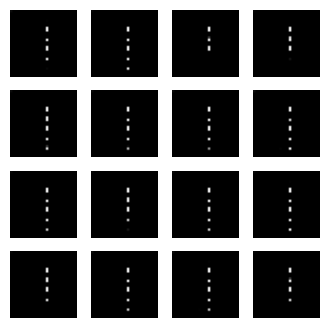

Epoch 1/50 completed


2025-03-20 05:28:00.793749: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


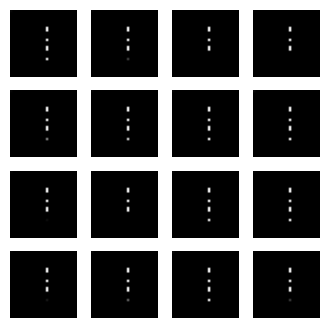

Epoch 2/50 completed


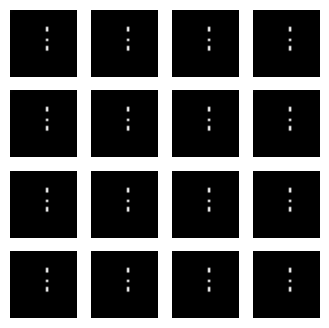

Epoch 3/50 completed


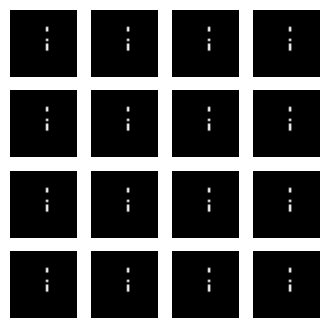

Epoch 4/50 completed


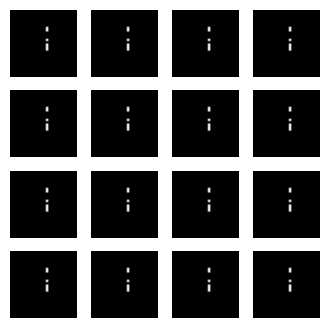

Epoch 5/50 completed


2025-03-20 05:35:40.593831: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


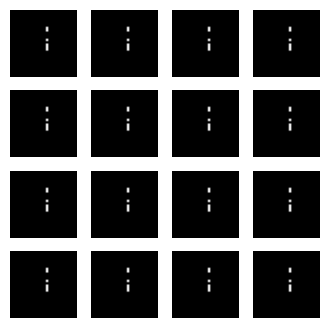

Epoch 6/50 completed


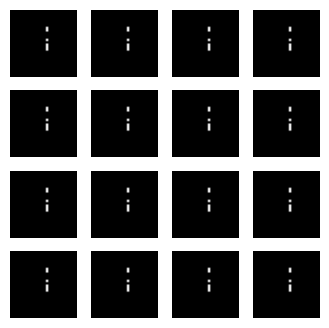

Epoch 7/50 completed


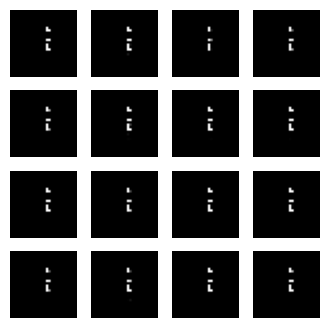

Epoch 8/50 completed


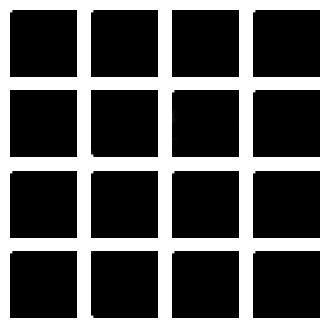

Epoch 9/50 completed


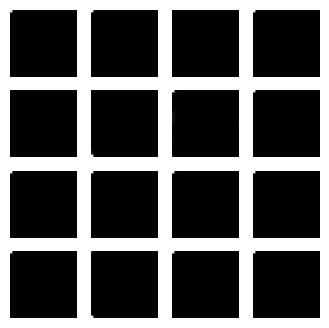

Epoch 10/50 completed


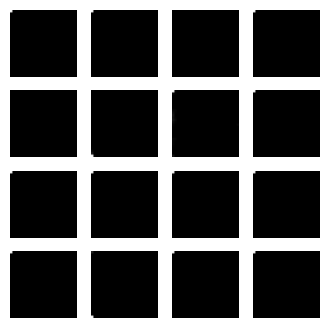

Epoch 11/50 completed


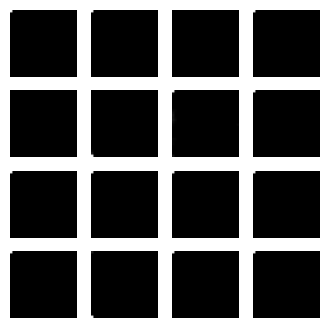

Epoch 12/50 completed


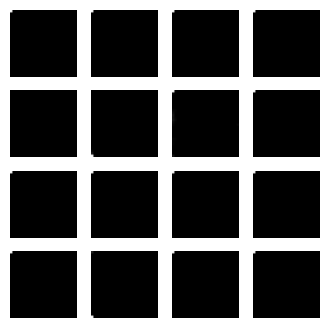

Epoch 13/50 completed


2025-03-20 05:50:43.616360: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


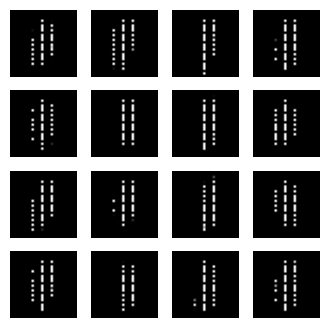

Epoch 14/50 completed


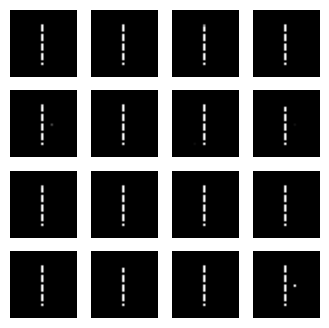

Epoch 15/50 completed


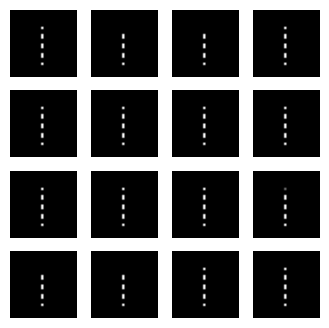

Epoch 16/50 completed


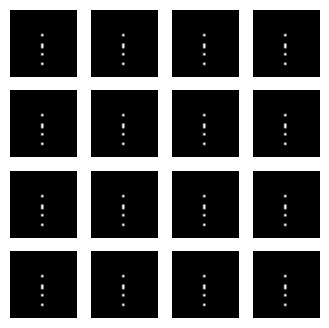

Epoch 17/50 completed


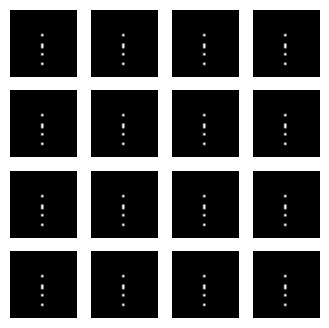

Epoch 18/50 completed


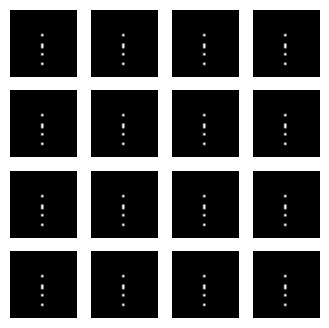

Epoch 19/50 completed


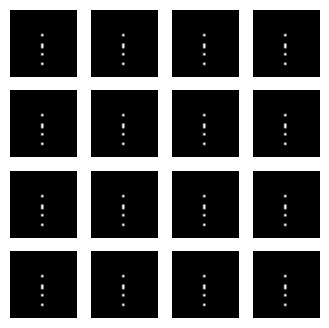

Epoch 20/50 completed


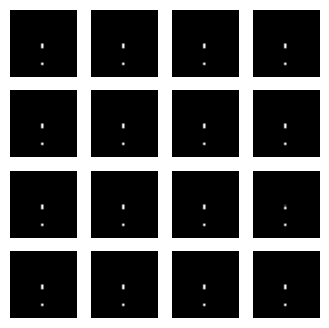

Epoch 21/50 completed


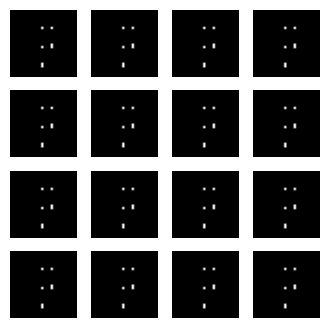

Epoch 22/50 completed


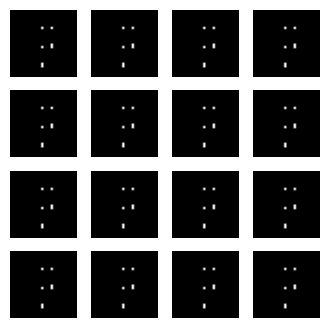

Epoch 23/50 completed


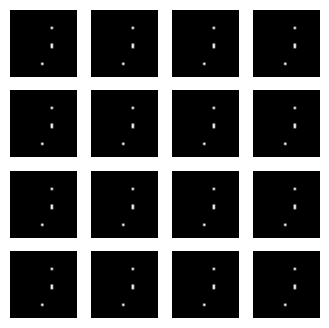

Epoch 24/50 completed


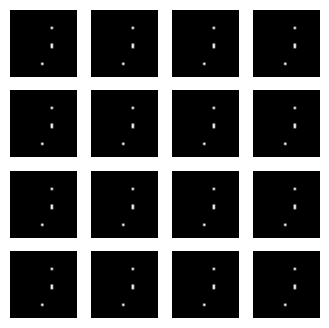

Epoch 25/50 completed


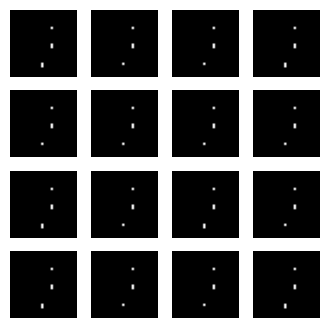

Epoch 26/50 completed


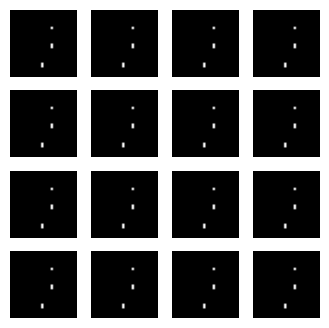

Epoch 27/50 completed


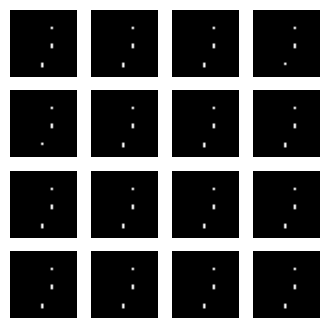

Epoch 28/50 completed


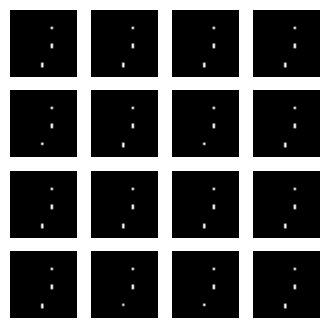

Epoch 29/50 completed


2025-03-20 06:20:50.860358: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


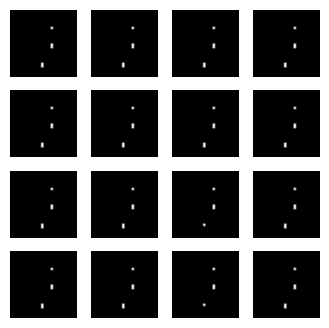

Epoch 30/50 completed


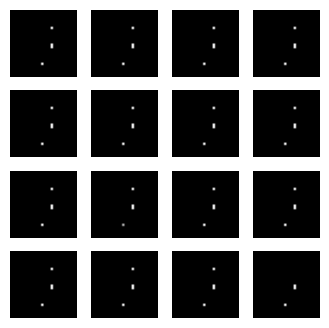

Epoch 31/50 completed


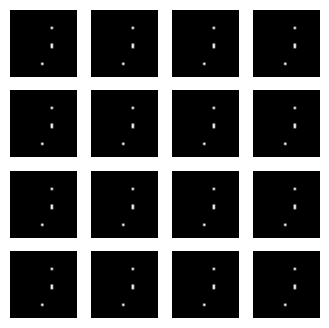

Epoch 32/50 completed


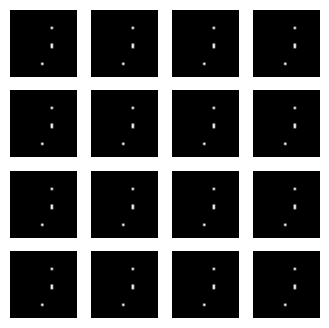

Epoch 33/50 completed


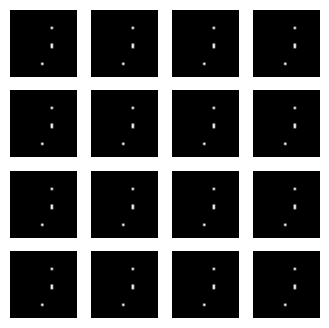

Epoch 34/50 completed


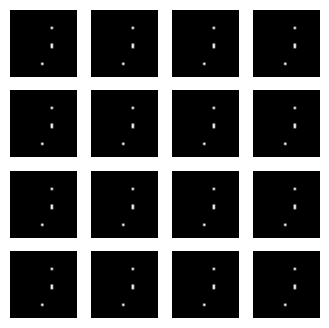

Epoch 35/50 completed


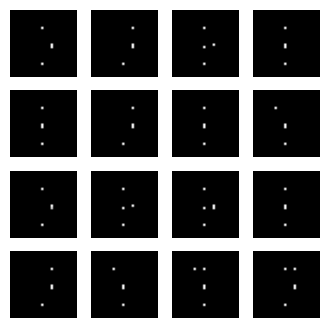

Epoch 36/50 completed


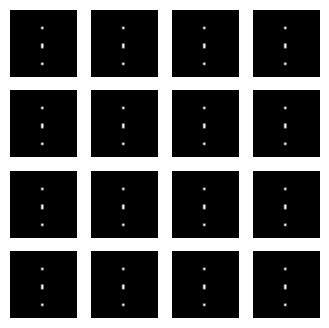

Epoch 37/50 completed


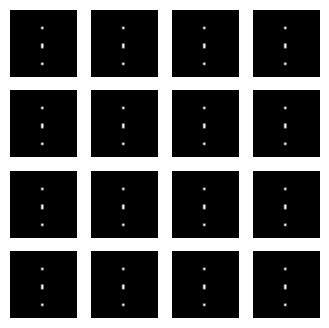

Epoch 38/50 completed


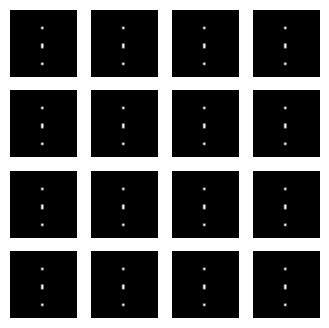

Epoch 39/50 completed


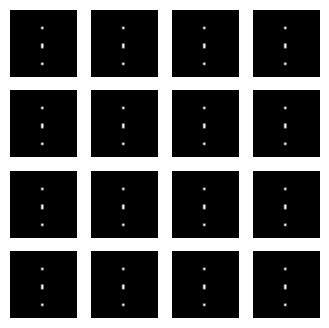

Epoch 40/50 completed


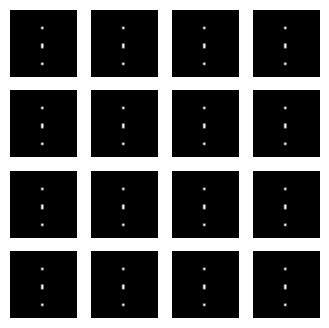

Epoch 41/50 completed


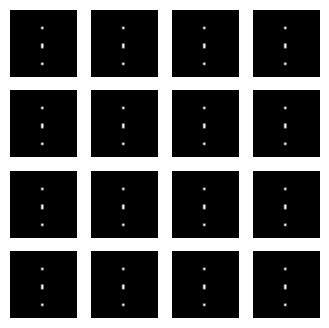

Epoch 42/50 completed


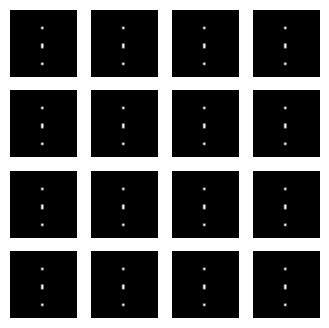

Epoch 43/50 completed


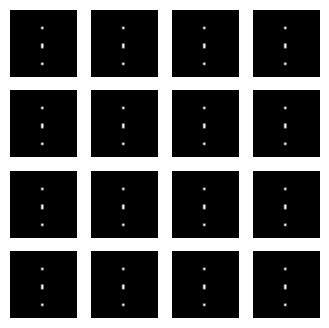

Epoch 44/50 completed


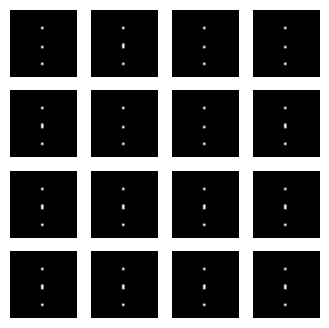

Epoch 45/50 completed


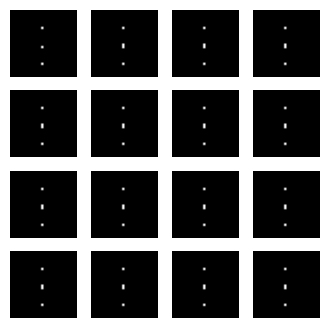

Epoch 46/50 completed


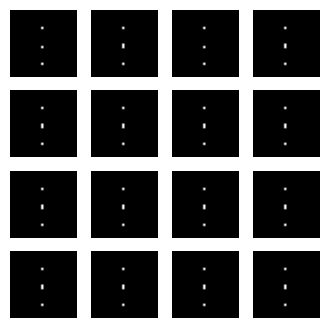

Epoch 47/50 completed


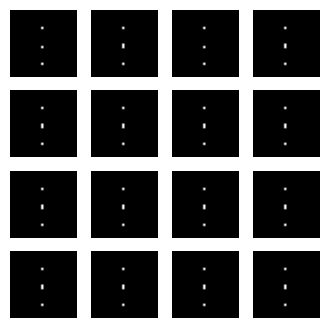

Epoch 48/50 completed


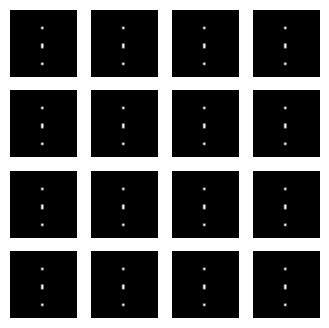

Epoch 49/50 completed


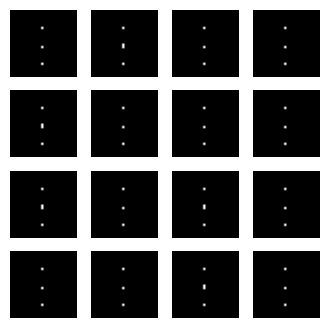

Epoch 50/50 completed


In [43]:
@tf.function
def train_step(real_images):
    batch_size = tf.shape(real_images)[0]
    noise = tf.random.normal([batch_size, 100])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)
        real_output = discriminator(real_images, training=True)
        fake_output = discriminator(generated_images, training=True)

        # Generator Loss
        gen_loss = cross_entropy(tf.ones_like(fake_output), fake_output)

        # Discriminator Loss
        disc_loss_real = cross_entropy(tf.ones_like(real_output), real_output)
        disc_loss_fake = cross_entropy(tf.zeros_like(fake_output), fake_output)
        disc_loss = disc_loss_real + disc_loss_fake

        gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
        gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

        generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
        discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))


EPOCHS = 50
BATCH_SIZE = 128
train_dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(10000).batch(BATCH_SIZE)

seed = tf.random.normal([16,100])

def generated_images(model, epch):
    predictions = model(seed, training=False)
    fig = plt.figure(figsize=(4,4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='grey')
        plt.axis('off')
    plt.show()

for epoch in range(EPOCHS):
    for batch in train_dataset:
        train_step(batch)
    generated_images(generator, epoch)
    print(f'Epoch {epoch+1}/{EPOCHS} completed')